## Quantitative Structure-Property Relationships



Quantitative Structure-Property Relationships (QSPR) and Quantitative
Structure-Activity Relationships (QSAR) use statistical models to relate a set
of predictor values to a response variable. Molecules are described using a set
of *descriptors*, and then mathematical relationships can be developed to explain
observed properties. In QSPR and QSAR, physico-chemical properties of theoretical
descriptors of chemicals are used to predict either a physical property or a
biological outcome.



## Molecular Descriptors



A molecular descriptor is &ldquo;final result of a logical and mathematical procedure,
which transforms chemical information encoded within a symbolic repre-sentation
of a molecule into a useful number or the result of some standardized
experiment&rdquo; (Todeschini, R.; Consonni, V. *Molecular descriptors for
chemoinformatics* **2009** Wiley‑VCH, Weinheim). You are already familiar with
descriptors such as molecular weight or number of heavy atoms and we have
queried PubChem for data such as XLogP. We&rsquo;ll examine just a few simple
descriptors, but thousands have been developed for applications in QSPR.



## Using rdkit and mordred to calculate descriptors



Clearly we have been using algorithms for calculating these indices. This is
time consuming for an individual, but programs can be used to complete this much
easier. We will use the rdkit and mordred python libraries to help us out.



In [25]:
import json
from rdkit import Chem                            # imports the Chem module from rdkit
from mordred import Calculator, descriptors       # imports mordred descriptor library
calc = Calculator(descriptors, ignore_3D=True)    # sets up a function reading descriptors
len(calc.descriptors) # tells us how many different types of descriptors are available in the library

1613

### Wiener Index



We already calculated the Wiener index for *n*-pentane and 2-methylpentane. Now
let&rsquo;s have mordred do it for us.



In [26]:
from mordred import WienerIndex
pentane = Chem.MolFromSmiles('CCCCC')                  # Use rdkit to create a mol file from the smiles string for n-pentane
methyl_pentane = Chem.MolFromSmiles('CCCC(C)C')        #  and for 2-methylpentane
wiener_index = WienerIndex.WienerIndex()               # create descriptor instance for Wiener index
result1 = wiener_index(pentane)                        # calculate wiener index for n-pentane
result2 = wiener_index(methyl_pentane)                 #  and for 2-methylpentane
print("The Wiener index for n-pentane is: ", result1)  # display result
print("The Wiener index for 2-methylpentane is: ", result2)

The Wiener index for n-pentane is:  20
The Wiener index for 2-methylpentane is:  32


### Zagreb Indices



And we can do the same for the different Zagreb indices for *n*-pentane and
2-methylpentane.



In [27]:
from mordred import ZagrebIndex

zagreb_index1 = ZagrebIndex.ZagrebIndex(version = 1)            # create descriptor instance for Zagreb index 1
zagreb_index2 = ZagrebIndex.ZagrebIndex(version = 2)            # create descriptor instance for Zagreb index 1

result_Z1 = zagreb_index1(pentane)                              # calculate Z1 descriptor value for n-pentane
result_Z2 = zagreb_index2(pentane)                              # calculate Z2 descriptor value for n-pentane
print("The Zagreb index 1 for n-pentane is:", result_Z1)
print("The Zagreb index 2 for n-pentane is:", result_Z2)

result_Z1 = zagreb_index1(methyl_pentane)                       # and for 2-methylpentane as well
result_Z2 = zagreb_index2(methyl_pentane)                      
print("The Zagreb index 1 for 2-methylpentane is:", result_Z1)
print("The Zagreb index 2 for 2-methylpentane is:", result_Z2)

The Zagreb index 1 for n-pentane is: 14.0
The Zagreb index 2 for n-pentane is: 12.0
The Zagreb index 1 for 2-methylpentane is: 20.0
The Zagreb index 2 for 2-methylpentane is: 18.0


As you can see from the code above, each index will have different code that
needs to be followed for programming. Each descriptor and the resulting code
syntax can be found here
[http://mordred-descriptor.github.io/documentation/master/api/modules.html](http://mordred-descriptor.github.io/documentation/master/api/modules.html)



### Looping through a list of molecules



Now that we have an understanding on how rdkit and mordred work to get our
descriptors, let&rsquo;s simplify the code using a looping structure:



In [28]:
smiles = ["CCC", "CCCC", "CCCCC", "CCCC(C)C","CC(C)C(C)C"]         #store smiles strings in a list

for smile in smiles:
    mol = Chem.MolFromSmiles(smile)                      # convert smiles string to mol file
    result_Z1 = zagreb_index1(mol)                       # calculate Z1 descriptor value
    result_Z2 = zagreb_index2(mol)                       # calculate Z2 descriptor value
    print("The Zagreb index 1 for", smile, "is:", result_Z1)
    print("The Zagreb index 2 for", smile, "is:", result_Z2)
    print()

The Zagreb index 1 for CCC is: 6.0
The Zagreb index 2 for CCC is: 4.0

The Zagreb index 1 for CCCC is: 10.0
The Zagreb index 2 for CCCC is: 8.0

The Zagreb index 1 for CCCCC is: 14.0
The Zagreb index 2 for CCCCC is: 12.0

The Zagreb index 1 for CCCC(C)C is: 20.0
The Zagreb index 2 for CCCC(C)C is: 18.0

The Zagreb index 1 for CC(C)C(C)C is: 22.0
The Zagreb index 2 for CC(C)C(C)C is: 21.0



## Using descriptors to predict molecular properties



For this exercise we will take a series of alkanes and create an equation that
will allow us to predict boiling points. We will start with a 30 molecule alkane
training set. We will obtain various descriptors and see how they can predict
the physical property boiling point.

For this exercise we will be using the [pandas](https://pandas.pydata.org/) (Python Data Analysis) library to
help us read, write and manage data. We will also use matplotlib to generate
graphs.



### Boiling Point data



Let&rsquo;s start by reading and graphing a set of boiling point data. First we read
our csv file into a pandas &ldquo;dataframe&rdquo;. Notice that we can generate a nicely
formatted table from our dataframe by just entering the name of the dataframe on
the last line.



In [29]:
import pandas as pd        # import the Python Data Analysis Library with the shortened name pd
df_bp = pd.read_csv("BP.csv") # read in the file into a pandas dataframe
df = df_bp
df.describe()                         # print the dataframe (also try df.head() and df.describe())

,compound,BP_C,BP_K,MW
count,30.000000,30.000000,30.000000,30.000000
mean,15.500000,66.873333,340.023333,92.721967
std,8.803408,73.511359,73.511359,30.315311
min,1.000000,-162.200000,110.950000,16.043000
25%,8.250000,39.525000,312.675000,75.657500
50%,15.500000,85.200000,358.350000,100.200000
75%,22.750000,111.900000,385.050000,114.230000
max,30.000000,174.200000,447.350000,142.280000


### Graphing the data



Now we can graph the data using matplotlib.



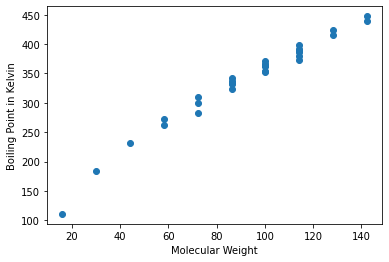

In [30]:
import matplotlib.pyplot as plt

plt.scatter(df.MW, df.BP_K)     # plot of boiling point (in K) vs molecular weight
plt.xlabel('Molecular Weight')
plt.ylabel('Boiling Point in Kelvin')
plt.show()

Clearly from the data we can see that we have multiple molecules with the same
molecular weight, but different boiling points. Molecular weight is therefore
not the best predictor of boiling point. We can see if there are other
descriptors that we can use such as Weiner or Zagreb. Let&rsquo;s add various
descriptors to the dataframe.



### Adding descriptors to the dataset



We can now calculate the Wiener and Zagreb indices for each of our
hydrocarbons and add them to the dataframe.



In [31]:
# create new lists to store results we calculate
result_Wiener= []
result_Z1= []
result_Z2= []

for index, row in df.iterrows():                # iterate through each row of the CSV data
    SMILE = row['SMILES']                       # get SMILES string from row
    mol = Chem.MolFromSmiles(SMILE)             # convert smiles string to mol file
    result_Wiener.append(wiener_index(mol))     # calculate Wiener index descripter value
    result_Z1.append(zagreb_index1(mol))        # calculate zagreb (Z1) descriptor value
    result_Z2.append(zagreb_index2(mol))        # calculate zagreb (Z2) descriptor value

df['Wiener'] = result_Wiener           # add the results for WienerIndex to dataframe
df['Z1'] = result_Z1                   # add the results for Zagreb 1 to dataframe
df['Z2'] = result_Z2                   # add the results for Zagreb 2 to dataframe
df                                     # print the updated dataframe

,compound,name,BP_C,BP_K,SMILES,MW,Wiener,Z1,Z2
0,1,Methane,-162.2,110.95,C,16.043,0,0.0,0.0
1,2,Ethane,-88.6,184.55,CC,30.070,1,2.0,1.0
2,3,propane,-42.2,230.95,CCC,44.100,4,6.0,4.0
3,4,butane,-0.1,273.05,CCCC,58.120,10,10.0,8.0
4,5,2-methylpropane,-11.2,261.95,CC(C)C,58.120,9,12.0,9.0
5,6,pentane,36.1,309.25,CCCCC,72.150,20,14.0,12.0
6,7,2-methylbutane,27.0,300.15,CC(C)CC,72.150,18,16.0,14.0
7,8,"2,2-dimethylpropane",9.5,282.65,CC(C)(C)C,72.150,16,20.0,16.0
8,9,hexane,68.8,341.95,CCCCCC,86.180,35,18.0,16.0
9,10,2-methylpentane,60.9,334.05,CC(C)CCC,86.180,32,20.0,18.0


Now we can see how each of these descriptors are related to the boiling points
of their respective compounds.



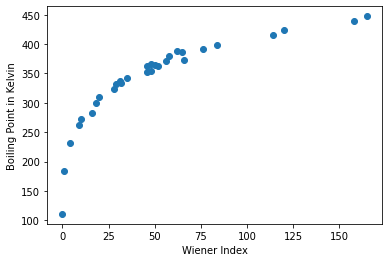

In [32]:
plt.scatter(df.Wiener, df.BP_K) # plot of BP versus Wiener index
plt.xlabel('Wiener Index')
plt.ylabel('Boiling Point in Kelvin')
plt.show()


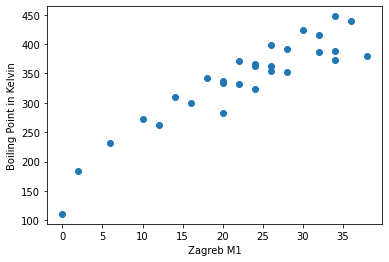

In [33]:
plt.scatter(df.Z1, df.BP_K) # plot of BP versus Zagreb M1
plt.xlabel('Zagreb M1')
plt.ylabel('Boiling Point in Kelvin')
plt.show()

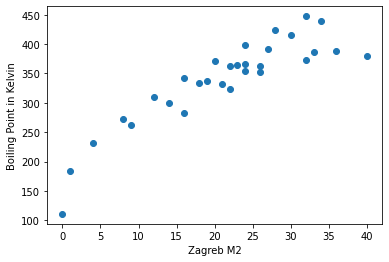

In [34]:
plt.scatter(df.Z2, df.BP_K) # plot of BP versus Zagreb M2
plt.xlabel('Zagreb M2')
plt.ylabel('Boiling Point in Kelvin')
plt.show()

exercise 1: try writing a block that plots the Z1 value vs the Z2 value

In [35]:
# exercise 1:

Clearly molecular weight was somewhat predictive, but problematic. It looks like
using the other indicators we have have some other ways to predict boiling
point.

One option is write this data to a new CSV file and work in Microsoft Excel to
perform a regression analysis. Exporting the data is straightforward and your
instructor may provide instructions on how to analyze the data using Excel.



In [36]:
df.to_csv('bp_descriptor_data.csv', encoding='utf-8', index=False)

Download the original QSPR.ipynb from Canvas and pip install statsmodel to explore
Mulitple regression analysis



# To explore creating a database, and creating an API start with:
pip install Flask

pip install sqlalchemy

And if you don't have sqlite installed (it comes with recent python installs):

pip install db-sqlite3

more info: 

https://flask.palletsprojects.com/en/2.2.x/quickstart/

https://docs.sqlalchemy.org/en/14/intro.html


First we will use an engine from sqlalchemy to convert our dataframe to a SQL (structured query language) database using sqlite, the SQL language built into python. The name of the database is 'chemical'.

In [37]:
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)
df_bp.to_sql('chemical', con=engine)

Once the 'chemical' database is created it can be interrogated with CRUD (create, read, update, and delete) operations using the SQLite langunge sent through the engine. Here we use the engine to execute a SELECT statement. In SQL the * means "all" so we are selecting all rows of the database where the column "name" has the value "Methane". Appending fetchall() to the end returns the result to us.

In [38]:
engine.execute("SELECT * FROM chemical WHERE chemical.name is 'Methane'").fetchall()

[(0, 1, 'Methane', -162.2, 110.95, 'C', 16.043, 0, 0.0, 0.0)]

In [39]:
engine.execute("SELECT * FROM chemical WHERE chemical.BP_C is -0.1").fetchall()

[(3, 4, 'butane', -0.1, 273.05, 'CCCC', 58.12, 10, 10.0, 8.0)]

exercise 2: try writing a line that returns propoane by MW from your SQL database 

In [40]:
# exercise 2

We can embed this engine in a function that returns the result as a dictionary in JSON (JavaScript Object Notation) format commonly used in http requests.

In [41]:
def get_chemicals(bp_value):
    chemicals = {}
    df_bp = pd.read_csv("BP.csv")
    engine = create_engine('sqlite://', echo=False)
    df_bp.to_sql('chemical', con=engine)
    col_names = ['index', 'compound_number', 'name', 'BP_C', 'BP_K', 'SMILES', 'MW']
    try:
        with engine.connect() as conn:
            conn = conn.execution_options(stream_results=True, max_row_buffer=100)
            result = conn.execute((f"SELECT * from chemical WHERE chemical.BP_C is {bp_value}"))

            for row in result:
                chemicals = {}
                for x, y in enumerate(row):
                    chemicals[col_names[x]] = y
    except:
        print('nothing to return')
        chemicals = {}
    chemicals_out = json.dumps(dict(chemicals), separators=(',', ':'))

    return chemicals_out

Now check this function out by submitting a bp_value. It must be sent as a string because of how the database was setup. More nuanced methods of creating your SQL schema where you can use integers or floating point numbers are described here: https://levelup.gitconnected.com/full-stack-web-app-with-python-react-and-bootstrap-backend-8592baa6e4eb

In [42]:
bp_value = '-0.1'
get_chemicals(bp_value)

'{"index":3,"compound_number":4,"name":"butane","BP_C":-0.1,"BP_K":273.05,"SMILES":"CCCC","MW":58.12}'

Now we will put it all together into an app using flask and create an API. Follow the directions below carefully. Running this code inside Jupyter casues problems becasue there is no easy way to shutdown your app. This block repeats material from earlier so that it is available to this standalone app.

In [43]:
# don't run the "app.run()" line in Jupyter. 
# Instead, copy the text of  this block and save as "first_app.py" after uncommenting the last 2 lines and 
# run it from a terminal or prompt with this command: "python3 first_app.py"
# The BP.csv file must be in the same folder


import pandas as pd
from sqlalchemy import create_engine
from flask import Flask, request, jsonify #added to top of file
from flask_cors import CORS #added to top of file
import json

def get_chemicals(bp_value):
    chemicals = {}
    df_bp = pd.read_csv("BP.csv")
    engine = create_engine('sqlite://', echo=False)
    df_bp.to_sql('chemical', con=engine)
    col_names = ['index', 'compound_number', 'name', 'BP_C', 'BP_K', 'SMILES', 'MW']
    try:
        with engine.connect() as conn:
            conn = conn.execution_options(stream_results=True, max_row_buffer=100)
            result = conn.execute(f"SELECT * from chemical WHERE chemical.BP_C is {bp_value}")

            for row in result:
                chemicals = {}
                for x, y in enumerate(row):
                    chemicals[col_names[x]] = y
    except:
        print('nothing to return')
        chemicals = {}
    chemicals_out = json.dumps(dict(chemicals), separators=(',', ':'))

    return chemicals_out

app = Flask(__name__)
CORS(app, resources={r"/*": {"origins": "*"}})

@app.route('/api/chemical/<name>', methods=['GET','POST'])

def api_get_users(name):
    return jsonify(get_chemicals(name))

# if __name__ == ('__main__'):
#     app.run()

In [45]:
import requests
mydata = '-0.1'
url = 'http://127.0.0.1:5000/api/chemical/-0.1'
req = requests.post(url, data = mydata)
print(req.text)

Assignment, option 1:

Improve upon this API to allow the user to POST specific data and receive a specific result (e.g. inputing a BP and/or Z1 value)

Assignment, option 2:

pip install statsmodel to explore mulitple regression analysis and complete the original notebook QSPR.ipynb from Canvas inlcluding the assignment at the bottom 


Hints:

You can do the API assignment using a GET instead of a POST. The main issue to solve is that you need to pass a variable following the variable rules discussed here: https://flask.palletsprojects.com/en/2.2.x/quickstart/#routingLinks to an external site.

And after getting the variable from the API it needs to get passed again to get_chemicals.

It is easier to troubleshoot in Jupyter compared to running scripts from terminal/command prompt. I’d recommend doing as much work as you can in Jupyter before saving the script and moving to terminal.

In Atom, if you save your file ending in .py it will recognize it as python and help get tabs to the correct position.

When you run your script in terminal or prompt, make sure that you are in an environment that has flask, flask_cors, sqlalchemy, json, and pandas installed.

You can check what packages are available in a given environment by typing “pip freeze” in your terminal. If you are unable to navigate to the environment you want, you can always create a new one with conda or with venv from the terminal and install the packages you need.

